#Load & Prepaire Data

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Convert target to integers
y = y.astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (56000, 784)
Test set shape: (14000, 784)


# 1.Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from tabulate import tabulate

In [ ]:
# Implement Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
def evaluate_performance(y_true, y_pred):
    '''classification report'''
    dtree_report = classification_report(y_true, y_pred)
    print("Decision Tree Classifier Performance Report:")
    print(dtree_report)
evaluate_performance(y_test, y_pred)

Decision Tree Classifier Performance Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.83      0.85      1380
           3       0.83      0.84      0.84      1433
           4       0.84      0.87      0.85      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.80      0.80      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



#2.Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##2.1Gaussian Naive Bayes

In [ ]:
# Standardize for GaussianNB
scaler = StandardScaler()
X_train_gauss = scaler.fit_transform(X_train)
X_test_gauss = scaler.transform(X_test)


In [ ]:
# Implement Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_gauss, y_train)
y_pred_gnb = gnb.predict(X_test_gauss)

In [ ]:
# Evaluate performance using classification reports
print("Gaussian Naive Bayes Performance Report:")
print(classification_report(y_test, y_pred_gnb))

Gaussian Naive Bayes Performance Report:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75      1343
           1       0.85      0.94      0.89      1600
           2       0.85      0.21      0.33      1380
           3       0.69      0.26      0.38      1433
           4       0.78      0.08      0.14      1295
           5       0.46      0.02      0.04      1273
           6       0.69      0.93      0.79      1396
           7       0.92      0.22      0.35      1503
           8       0.26      0.62      0.37      1357
           9       0.36      0.95      0.52      1420

    accuracy                           0.53     14000
   macro avg       0.65      0.51      0.46     14000
weighted avg       0.65      0.53      0.47     14000



## 2.2 Multinomial Naive Bayes

In [ ]:
# Normalize for MultinomialNB (values should be non-negative)
minmax_scaler = MinMaxScaler()
X_train_multi = minmax_scaler.fit_transform(X_train)
X_test_multi = minmax_scaler.transform(X_test)

In [ ]:
# Implement Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_multi, y_train)
y_pred_mnb = mnb.predict(X_test_multi)

In [ ]:
print("Multinomial Naive Bayes Performance Report:")
print(classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes Performance Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1343
           1       0.87      0.94      0.90      1600
           2       0.88      0.82      0.85      1380
           3       0.80      0.82      0.81      1433
           4       0.83      0.74      0.78      1295
           5       0.86      0.67      0.75      1273
           6       0.88      0.91      0.89      1396
           7       0.94      0.83      0.88      1503
           8       0.67      0.78      0.72      1357
           9       0.70      0.84      0.76      1420

    accuracy                           0.83     14000
   macro avg       0.83      0.82      0.83     14000
weighted avg       0.84      0.83      0.83     14000



#3.Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
import time

## 3.1 Linear Kernel SVM

In [ ]:
# Implement Linear Kernel SVM
print("Training SVM with Linear Kernel...")
start_time = time.time()
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
end_time = time.time()

Training SVM with Linear Kernel...


In [ ]:
print("Linear Kernel SVM Performance Report:")
print(classification_report(y_test, y_pred_linear))
print(f"Time taken: {end_time - start_time:.2f} seconds\n")

Linear Kernel SVM Performance Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.95      0.98      0.97      1600
           2       0.89      0.92      0.90      1380
           3       0.88      0.91      0.90      1433
           4       0.90      0.94      0.92      1295
           5       0.87      0.88      0.88      1273
           6       0.96      0.93      0.94      1396
           7       0.95      0.93      0.94      1503
           8       0.92      0.85      0.88      1357
           9       0.92      0.89      0.91      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

Time taken: 456.69 seconds



## 3.2 SVM with RBF Kernel

In [ ]:
# Implement RBF Kernel SVM
print("Training SVM with RBF Kernel...")
start_time = time.time()
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
end_time = time.time()

Training SVM with RBF Kernel...


In [ ]:
print("RBF Kernel SVM Performance Report:")
print(classification_report(y_test, y_pred_rbf))
print(f"Time taken: {end_time - start_time:.2f} seconds\n")

RBF Kernel SVM Performance Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.92      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.93      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

Time taken: 545.42 seconds



#4.k-Nearest Neighbors (k-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Experiment with different k values
k_values = [3, 5, 7, 9, 11]
best_k = None
best_accuracy = 0
results = []

In [ ]:
print("Evaluating k-NN Classifier with different k values...\n")
for k in k_values:
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    results.append((k, accuracy))

    print(f"k = {k}: Accuracy = {accuracy:.4f} | Time taken = {end_time - start_time:.2f} seconds")
    # Track the best k value
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("\nOptimal k value:", best_k)
print("Best Accuracy:", best_accuracy)

Evaluating k-NN Classifier with different k values...

k = 3: Accuracy = 0.9465 | Time taken = 48.02 seconds
k = 5: Accuracy = 0.9458 | Time taken = 63.59 seconds
k = 7: Accuracy = 0.9439 | Time taken = 65.56 seconds
k = 9: Accuracy = 0.9432 | Time taken = 43.91 seconds
k = 11: Accuracy = 0.9401 | Time taken = 56.70 seconds

Optimal k value: 3
Best Accuracy: 0.9465


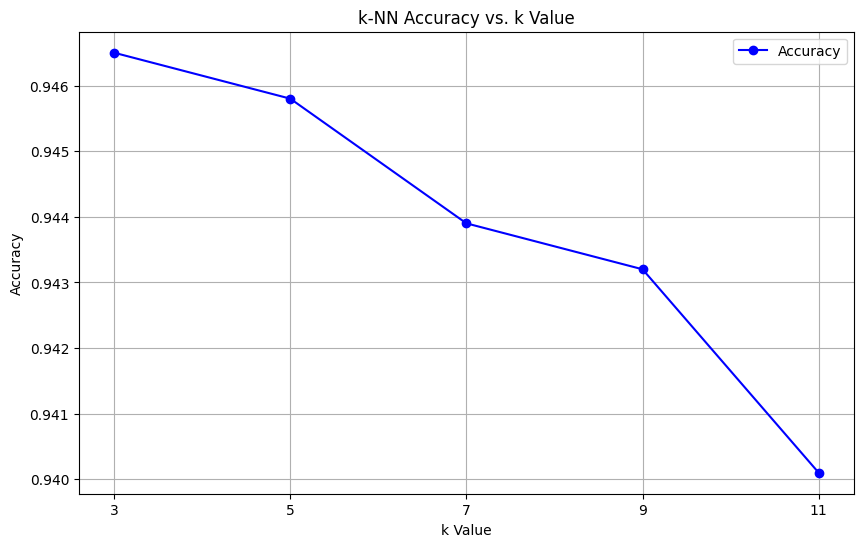

In [ ]:
import matplotlib.pyplot as plt
def plot_knn_results(k_values, accuracies):
    # accuracy vs. k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy')
    plt.title('k-NN Accuracy vs. k Value')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()

# results from the k-NN experiment
k_values = [3, 5, 7, 9, 11]
accuracies = [0.9465, 0.9458, 0.9439, 0.9432, 0.9401]

plot_knn_results(k_values, accuracies)


#5.Ensemble Methods

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 5.1Bagging with Decision Trees

In [ ]:
# Bagging using Decision Trees
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging accuracy: {accuracy_bagging:.4f}")


Bagging accuracy: 0.9557


##5.2 Random Forest

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest accuracy: {accuracy_rf:.4f}")

Random Forest accuracy: 0.9641


##5.3 AdaBoost with Decision Trees

In [ ]:
# AdaBoost using Decision Trees
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                               n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost accuracy: {accuracy_ada:.4f}")

AdaBoost accuracy: 0.6426


##5.4 XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=50, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost accuracy: {accuracy_xgb:.4f}")

XGBoost accuracy: 0.9739
